In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Part One: EDA

### Importing data and inspection

There are three separate tables; 'Episodes', 'Characters' and 'Scores'. 

In [17]:
#We begin by importing the three datasets
episodes = pd.read_csv(r"C:\Users\tom-i\Downloads\archive (3)\simpsons_episodes.csv")

In [119]:
scores = pd.read_csv(r"C:\Users\tom-i\Downloads\archive (3)\simpsons_rt_scores.csv")

In [6]:
characters = pd.read_csv(r"C:\Users\tom-i\Downloads\archive (3)\simpsons_characters.csv")

In [113]:
#Initial inspection of the 'episodes' dataframe:
episodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      747 non-null    int64  
 1   title                   747 non-null    object 
 2   description             747 non-null    object 
 3   original_air_date       747 non-null    object 
 4   production_code         747 non-null    object 
 5   directed_by             747 non-null    object 
 6   written_by              747 non-null    object 
 7   season                  747 non-null    int64  
 8   number_in_season        747 non-null    int64  
 9   number_in_series        747 non-null    int64  
 10  us_viewers_in_millions  744 non-null    object 
 11  imdb_rating             739 non-null    float64
dtypes: float64(1), int64(4), object(7)
memory usage: 70.2+ KB


In [121]:
episodes.shape

(747, 12)

There are 747 rows in the dataframe and 12 columns. 10 of the rows have no values missing. Let's now get a general over view of the data and the distribution.

In [14]:
episodes.describe()

,id,season,number_in_season,number_in_series,imdb_rating
count,747.000000,747.000000,747.000000,747.000000,739.000000
mean,373.000000,17.444444,15.844712,3053.044177,7.162246
std,215.784615,9.734715,82.734483,42322.495748,0.817091
min,0.000000,1.000000,1.000000,1.000000,4.000000
25%,186.500000,9.000000,6.000000,187.500000,6.600000
50%,373.000000,17.000000,12.000000,374.000000,7.000000
75%,559.500000,26.000000,17.000000,560.500000,7.700000
max,746.000000,34.000000,1920.000000,712713.000000,9.300000


There are 747 episodes over 34 seasons. The mean IMDB score for episodes is 7.16, with a minimum of 4.0 and a highest score of 9.3. Let's quickly visualise this distribution:

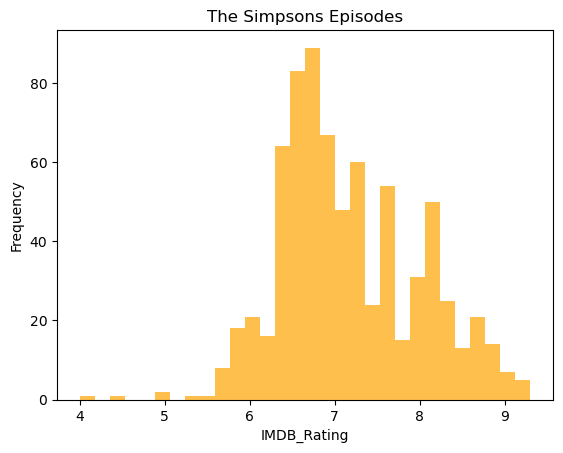

In [140]:
plt.hist(episodes['imdb_rating'],bins=30, color='orange', alpha=0.7)

# Set labels and title
plt.xlabel('IMDB_Rating')
plt.ylabel('Frequency')
plt.title('The Simpsons Episodes')

# Show the plot
plt.show()

The median imdb_rating for Simpsons Episodes is approximately 6.8 while we know that the mean rating is 7.16. Let's now calculate how many episodes of the simpsons are rated above averege (mean) in the show's enitre history.

In [143]:
average_rating = episodes['imdb_rating'].mean()
count_above_avg = (episodes['imdb_rating'] > average_rating).sum()
percent = count_above_avg / episodes['id'].value_counts().sum() *100
print(f'There are a total of {count_above_avg} episodes that are rated as above average.')
print(f'The percentage of episodes of The Simpsons that are rated above average on IMDB is {percent} %')

There are a total of 319 episodes that are rated as above average.
The percentage of episodes of The Simpsons that are rated above average on IMDB is 42.704149933065594 %


In [28]:
characters.columns

Index(['id', 'name', 'normalized_name', 'gender'], dtype='object')

In [30]:
characters['gender'].value_counts()

gender
m    252
f     71
Name: count, dtype: int64

In [31]:
#There are 252 male characters and 71 female characters

In [32]:
#Lets' have a look at the episodes dataframe.

In [34]:
episodes.columns

Index(['id', 'title', 'description', 'original_air_date', 'production_code',
       'directed_by', 'written_by', 'season', 'number_in_season',
       'number_in_series', 'us_viewers_in_millions', 'imdb_rating'],
      dtype='object')

In [35]:
episodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      747 non-null    int64  
 1   title                   747 non-null    object 
 2   description             747 non-null    object 
 3   original_air_date       747 non-null    object 
 4   production_code         747 non-null    object 
 5   directed_by             747 non-null    object 
 6   written_by              747 non-null    object 
 7   season                  747 non-null    int64  
 8   number_in_season        747 non-null    int64  
 9   number_in_series        747 non-null    int64  
 10  us_viewers_in_millions  744 non-null    object 
 11  imdb_rating             739 non-null    float64
dtypes: float64(1), int64(4), object(7)
memory usage: 70.2+ KB


In [39]:
episodes.shape

(747, 12)

In [40]:
#It looks like there are missing values in the imdb_rating column.

In [41]:
episodes['imdb_rating'].isnull().sum()

8

In [42]:
#There are 8 missing values in the imdb_rating column

In [43]:
episodes.describe()

,id,season,number_in_season,number_in_series,imdb_rating
count,747.000000,747.000000,747.000000,747.000000,739.000000
mean,373.000000,17.444444,15.844712,3053.044177,7.162246
std,215.784615,9.734715,82.734483,42322.495748,0.817091
min,0.000000,1.000000,1.000000,1.000000,4.000000
25%,186.500000,9.000000,6.000000,187.500000,6.600000
50%,373.000000,17.000000,12.000000,374.000000,7.000000
75%,559.500000,26.000000,17.000000,560.500000,7.700000
max,746.000000,34.000000,1920.000000,712713.000000,9.300000


In [46]:
mean_ep = episodes["imdb_rating"].mean()

In [50]:
ep_above_avg = episodes['imdb_rating'].value_counts() > mean_ep

In [142]:
ep_above_avg

imdb_rating
7.1     True
6.8     True
6.5     True
6.7     True
6.3     True
6.6     True
7.0     True
6.9     True
7.3     True
7.2     True
7.6     True
7.7     True
6.4     True
8.1     True
8.2     True
8.3     True
8.0     True
6.2     True
8.6     True
7.8     True
7.4     True
7.9     True
8.5     True
6.1     True
8.8     True
5.8     True
7.5     True
6.0     True
5.9     True
8.4    False
8.7    False
9.0    False
5.7    False
9.2    False
5.6    False
8.9    False
5.0    False
9.3    False
4.0    False
5.5    False
9.1    False
5.4    False
4.4    False
Name: count, dtype: bool

In [58]:
episodes[episodes['imdb_rating'].sum()

SyntaxError: incomplete input (1510046319.py, line 1)

In [53]:
episodes[episodes['imdb_rating'].isin(ep_above_avg.index[ep_above_avg])].count()

id                        697
title                     697
description               697
original_air_date         697
production_code           697
directed_by               697
written_by                697
season                    697
number_in_season          697
number_in_series          697
us_viewers_in_millions    695
imdb_rating               697
dtype: int64

In [54]:
#The average imdb score for a Simpsons episode is 7.16 (7.2). There are 697 episodes of the simpsons that are rated above the mean imdb score. Let's find the percentage.

In [59]:
percent_eps_above_avg = count_above_avg = (episodes['imdb_rating'] > average_rating).sum()

NameError: name 'average_rating' is not defined

In [60]:
average_rating = episodes['imdb_rating'].mean()

In [61]:
count_above_avg = (episodes['imdb_rating'] > average_rating).sum()

In [77]:
percent = count_above_avg / episodes['id'].value_counts().sum() *100

In [88]:
print(f'The percentage of episodes of The Simpsons that are rated above average on IMDB is {percent} %')

The percentage of episodes of The Simpsons that are rated above average on IMDB is 42.704149933065594 %


In [89]:
#Let's say we are interested in which characters feature most prominantly in the highest rated episodes of The Simpsons. We can do that by merging the 'characters' df to the episodes df. 

In [96]:
df = episodes.merge(characters, how='left', on='id')

In [97]:
df.head()

,id,title,description,original_air_date,production_code,directed_by,written_by,season,number_in_season,number_in_series,us_viewers_in_millions,imdb_rating,name,normalized_name,gender
0,0,Simpsons Roasting on an Open Fire,Homer is forced to become a department store S...,1989-12-17,7G08,David Silverman,Mimi Pond,1,1,1,26.7,8.1,NaN,NaN,NaN
1,1,Bart the Genius,Bart ends up at a school for gifted children a...,1990-01-14,7G02,David Silverman,Jon Vitti,1,2,2,24.5,7.7,Marge Simpson,marge simpson,f
2,2,Homer's Odyssey,"After losing his job, Homer contemplates endin...",1990-01-21,7G03,Wes Archer,Jay Kogen & Wallace Wolodarsky,1,3,3,27.5,7.3,Homer Simpson,homer simpson,m
3,3,There's No Disgrace Like Home,After being embarrassed by the rest of the fam...,1990-01-28,7G04,Gregg Vanzo & Kent Butterworth,Al Jean & Mike Reiss,1,4,4,20.2,7.7,Seymour Skinner,seymour skinner,m
4,4,Bart the General,After being beaten up by Nelson Muntz one too ...,1990-02-04,7G05,David Silverman,John Swartzwelder,1,5,5,27.1,7.9,JANEY,janey,f


In [99]:
df.columns

Index(['id', 'title', 'description', 'original_air_date', 'production_code',
       'directed_by', 'written_by', 'season', 'number_in_season',
       'number_in_series', 'us_viewers_in_millions', 'imdb_rating', 'name',
       'normalized_name', 'gender'],
      dtype='object')

In [112]:
imdb_character_score = df.groupby('name').apply(lambda x: x.sort_values('imdb_rating').mean())

TypeError: Could not convert ['She Used to Be My Girl'
 'Marge becomes jealous when Lisa begins idolizing her old high school friend, Chloe Talbot, a famous reporter.    '
 '2004-12-05' 'FABF22' 'Matthew Nastuk' 'Tim Long' '10.81'
 '1st board member' 0] to numeric